<a href="https://colab.research.google.com/github/santoshkumar30/Quora_pair/blob/master/Quora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Don't close this browser tab while your project is running.

**Run the code block below to start your Clouderizer project. **

In [41]:
!curl -s "https://console.clouderizer.com/givemeinitsh/0f9E7HDX" | bash

Great! Your Clouderizer project is initializing...it might take few minutes before it is ready.

**************************************************************************************
YOU SHOULD NOW SWITCH BACK TO CLOUDERIZER WEB PAGE TO START WORKING ON YOUR PROJECT
**************************************************************************************


In [42]:
!wget -NS --content-disposition https://console.clouderizer.com/givemeinitsh/0f9E7HDX && bash ./clouderizer_init.sh

--2019-05-22 14:37:57--  https://console.clouderizer.com/givemeinitsh/0f9E7HDX
Resolving console.clouderizer.com (console.clouderizer.com)... 35.211.27.27
Connecting to console.clouderizer.com (console.clouderizer.com)|35.211.27.27|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Server: nginx/1.10.3 (Ubuntu)
  Date: Wed, 22 May 2019 14:37:57 GMT
  Content-Type: application/octet-stream; charset=utf-8
  Content-Length: 5670
  Connection: keep-alive
  X-Powered-By: Sails <sailsjs.org>
  Access-Control-Allow-Origin: 
  Access-Control-Allow-Credentials: 
  Access-Control-Allow-Methods: 
  Access-Control-Allow-Headers: 
  Access-Control-Expose-Headers: 
  Content-Disposition: attachment; filename="clouderizer_init.sh"
  ETag: W/"1626-gpIOHlMmtdJegeT1DUbp+A"
  set-cookie: sails.sid=s%3A3HXy1D5NmRJBM5TsMp8z7yTL3M8w1YsS.zFeoVCfk68dOGn1%2BYl4W4EWuTCpRB3o7O%2FlbrydIWAc; Path=/; HttpOnly
Length: 5670 (5.5K) [application/octet-stream]
Last-modified header missing --

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [44]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santoshkumar30","key":"3b66df0b6f6d08bd41846b85da8b4bef"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [46]:
!kaggle datasets download -d quora/question-pairs-dataset
!ls

question-pairs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
clouderizer			updatestatus.17  updatestatus.35
clouderizer_init.sh		updatestatus.18  updatestatus.36
clouderizer.jar			updatestatus.19  updatestatus.37
clouderizer.service		updatestatus.2	 updatestatus.38
colab_init.sh			updatestatus.20  updatestatus.39
install_clouderizer_service.sh	updatestatus.21  updatestatus.4
kaggle.json			updatestatus.22  updatestatus.40
question-pairs-dataset.zip	updatestatus.23  updatestatus.41
questions.csv			updatestatus.24  updatestatus.42
sample_data			updatestatus.25  updatestatus.43
temp.sh				updatestatus.26  updatestatus.44
updatestatus			updatestatus.27  updatestatus.45
updatestatus.1			updatestatus.28  updatestatus.46
updatestatus.10			updatestatus.29  updatestatus.47
updatestatus.11			updatestatus.3	 updatestatus.5
updatestatus.12			updatestatus.30  updatestatus.6
updatestatus.13			updatestatus.31  updatestatus.7
updatestatus.14			updatestat

In [47]:
!unzip question-pairs-dataset.zip

Archive:  question-pairs-dataset.zip
replace questions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: questions.csv           


In [48]:
!ls

clouderizer			updatestatus.17  updatestatus.35
clouderizer_init.sh		updatestatus.18  updatestatus.36
clouderizer.jar			updatestatus.19  updatestatus.37
clouderizer.service		updatestatus.2	 updatestatus.38
colab_init.sh			updatestatus.20  updatestatus.39
install_clouderizer_service.sh	updatestatus.21  updatestatus.4
kaggle.json			updatestatus.22  updatestatus.40
question-pairs-dataset.zip	updatestatus.23  updatestatus.41
questions.csv			updatestatus.24  updatestatus.42
sample_data			updatestatus.25  updatestatus.43
temp.sh				updatestatus.26  updatestatus.44
updatestatus			updatestatus.27  updatestatus.45
updatestatus.1			updatestatus.28  updatestatus.46
updatestatus.10			updatestatus.29  updatestatus.47
updatestatus.11			updatestatus.3	 updatestatus.5
updatestatus.12			updatestatus.30  updatestatus.6
updatestatus.13			updatestatus.31  updatestatus.7
updatestatus.14			updatestatus.32  updatestatus.8
updatestatus.15			updatestatus.33  updatestatus.9
updatestatus.16			updatestatus.34


In [0]:
import pandas as pd
data=pd.read_csv('questions.csv')

In [50]:
data.shape

(404351, 6)

In [51]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [0]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [0]:
new_data=data.head(20000)

In [54]:
new_data.shape

(20000, 6)

In [55]:
new_data.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [56]:
new_data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [57]:
new_data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [58]:
new_data['is_duplicate'].value_counts()

0    12525
1     7475
Name: is_duplicate, dtype: int64

In [0]:
def review_to_wordlist(review, remove_stopwords=True):
    # Clean the text, with the option to remove stopwords.
    
    # Convert words to lower case and split them
    if type(review) is str:
        words = review.lower().split()

    # Optionally remove stop words (true by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    
    review_text = " ".join(words)

    # Clean the text
    review_text = re.sub(r"[^A-Za-z0-9(),!.?\'\`]", " ", review_text)
    review_text = re.sub(r"\'s", " 's ", review_text)
    review_text = re.sub(r"\'ve", " 've ", review_text)
    review_text = re.sub(r"n\'t", " 't ", review_text)
    review_text = re.sub(r"\'re", " 're ", review_text)
    review_text = re.sub(r"\'d", " 'd ", review_text)
    review_text = re.sub(r"\'ll", " 'll ", review_text)
    review_text = re.sub(r",", " ", review_text)
    review_text = re.sub(r"\.", " ", review_text)
    review_text = re.sub(r"!", " ", review_text)
    review_text = re.sub(r"\(", " ( ", review_text)
    review_text = re.sub(r"\)", " ) ", review_text)
    review_text = re.sub(r"\?", " ", review_text)
    review_text = re.sub(r"\s{2,}", " ", review_text)
    
    words = review_text.split()
    
    # Shorten words to their stems
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in words]
    
    review_text = " ".join(stemmed_words)
    
    # Return a list of words
    return(review_text)

In [0]:
def process_questions(question_list, questions, question_list_name):
# function to transform questions and display progress
    for question in questions:
        question_list.append(review_to_wordlist(question))
        if len(question_list) % 10000 == 0:
            progress = len(question_list)/len(new_data) * 100
            print("{} is {}% complete.".format(question_list_name, round(progress, 1)))

In [66]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
questions1 = []     
process_questions(questions1, new_data.question1, "questions1")
print()
questions2 = []     
process_questions(questions2, new_data.question2, "questions2")

questions1 is 50.0% complete.
questions1 is 100.0% complete.

questions2 is 50.0% complete.
questions2 is 100.0% complete.


In [72]:
for i in range(5):
    print(questions1[i])
    print(questions2[i])
    print()

step step guid invest share market india
step step guid invest share market

stori kohinoor ( koh i noor ) diamond
would happen indian govern stole kohinoor ( koh i noor ) diamond back

increas speed internet connect use vpn
internet speed increas hack dns

mental lone solv it
find remaind math 23 24 math divid 24 23

one dissolv water quik sugar salt methan carbon di oxid
fish would surviv salt water



In [73]:
invalid_questions = []
for i in range(len(questions1)):
    # questions need to contain a vowel (which should be part of a full word) to be valid
    if not re.search('[aeiouyAEIOUY]', questions1[i]) or not re.search('[aeiouyAEIOUY]', questions2[i]):
    # Need to subtract 'len(invalid_questions)' to adjust for the changing index values as questions are removed.
        invalid_questions.append(i-len(invalid_questions))
print(len(invalid_questions))

24


In [74]:
invalid_questions

[812,
 1509,
 3303,
 3397,
 3658,
 3757,
 6870,
 7361,
 7812,
 9737,
 10098,
 10573,
 10602,
 11427,
 12799,
 13001,
 13781,
 15223,
 15478,
 17469,
 17495,
 18122,
 18521,
 19854]

In [75]:
questions1[812]

'gdp'

In [76]:
questions2[812]

'signific gdp'

In [0]:
# Remove the invalid questions
for index in invalid_questions:
    new_data = new_data[new_data.id != index]
    questions1.pop(index)
    questions2.pop(index)


In [0]:
vectorizer = TfidfVectorizer()
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [79]:
Tfidf_scores = []
for i in range(len(questions1)):
    score = cosine_sim(questions1[i], questions2[i])
    Tfidf_scores.append(score)
    if i % 10000 == 0:
        progress = i/len(questions1) * 100
        print("Similarity Scores is {}% complete.".format(round(progress,2)))

Similarity Scores is 0.0% complete.
Similarity Scores is 50.06% complete.


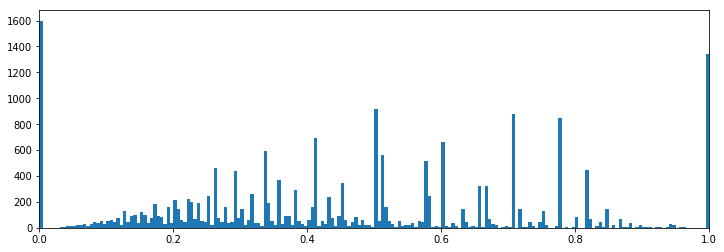

In [80]:
plt.figure(figsize=(12,4))
plt.hist(Tfidf_scores, bins = 200)
plt.xlim(0,1)
plt.show()